In [1]:
import sys
sys.path.append("Python-ELM")
from elm import *
from random_layer import *

import numpy as np
from matplotlib import pyplot as plt
import pandas

import sklearn.metrics as sm
from scipy.special import expit

from sklearn import preprocessing

import sklearn as sk

%matplotlib inline

In [2]:
def getDataWindowed(data,inSize,outSize):
    if outSize > inSize:
        biggest = outSize
    else:
        biggest = inSize
    
    matrixIn = np.zeros((len(data)-biggest, inSize))
    matrixOut = np.zeros((len(data)-biggest, outSize))
    
    for i in range(len(data)-2*biggest):
        matrixIn[i,:] = data[i:i+inSize]
        matrixOut[i,:] = data[i+inSize+1:i+inSize+outSize+1]
    return matrixIn,matrixOut

In [3]:
def times_series_cv(data_len, inSize,outSize):
    cv = []

    for i  in range(inSize,data_len-inSize):
        train_vector = np.arange(i)
        test_vector = np.arange(i,i+outSize)
        cv.append([train_vector,test_vector])
    return cv  
times_series_cv(100,12,12)

[[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
  array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])],
 [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
  array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])],
 [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
  array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])],
 [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
  array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])],
 [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
  array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])],
 [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
  array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])],
 [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17]), array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])],
 [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,

In [4]:
b08 = pandas.read_csv('../data/b08c2.csv')
b08_viento = b08["viento"].as_matrix()

prediction_steps = 12
input_steps = 12

In [5]:
train_perc = 0.8

datalen = len(b08_viento)
trainlen = int(train_perc*(datalen))

minmax = preprocessing.MinMaxScaler() 
standarization = preprocessing.StandardScaler()

minmax.fit(b08_viento[:trainlen].reshape(-1,1))
standarization.fit(b08_viento[:trainlen].reshape(-1,1))

preproc = minmax

data = preproc.transform(b08_viento.reshape(-1,1)).reshape((-1,))

In [6]:
dataIn,dataOut = getDataWindowed(data,input_steps,prediction_steps)

In [7]:
train_data,train_output = dataIn[:trainlen],dataOut[:trainlen]
test_data, test_output  = dataIn[trainlen:-prediction_steps],dataOut[trainlen:-prediction_steps]

In [8]:
rl = RandomLayer( n_hidden = 1000, alpha = 1, 
    activation_func = "sigmoid")

In [9]:
elmr = GenELMRegressor( hidden_layer = rl )

In [10]:
elmr.fit( train_data, train_output)

GenELMRegressor(hidden_layer=RandomLayer(activation_args=None, activation_func='sigmoid', alpha=1,
      n_hidden=1000, random_state=None, rbf_width=1.0,
      user_components=None),
        regressor=None)

In [11]:
prediction = elmr.predict(test_data)

In [13]:
print(sm.mean_squared_error(test_output, prediction))
print(sm.explained_variance_score(test_output,prediction))
print(sm.mean_absolute_error(test_output,prediction))
print(sm.r2_score(test_output,prediction))

0.021745059352
0.166739045588
0.115233861194
0.102864146671


/home/tronco/anaconda3/lib/python3.5/site-packages/sklearn/metrics/regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


In [15]:
total = 0
for i in range(prediction_steps):
    total += sm.mean_squared_error(test_output[:,i], prediction[:,i])
total

0.26094071222442228

T = 1


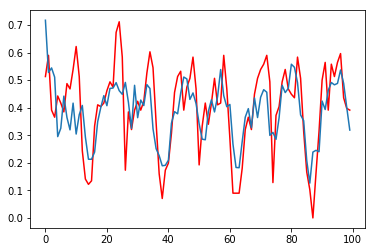

T = 2


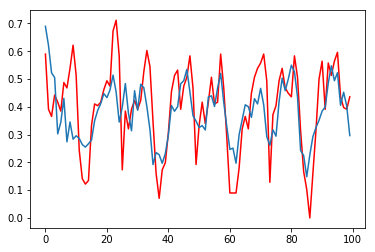

T = 3


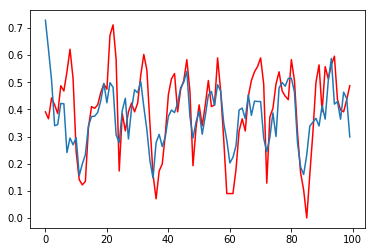

T = 4


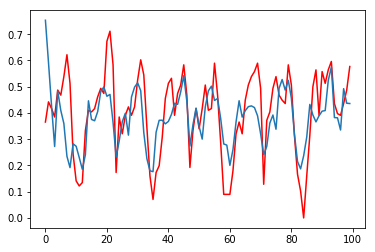

T = 5


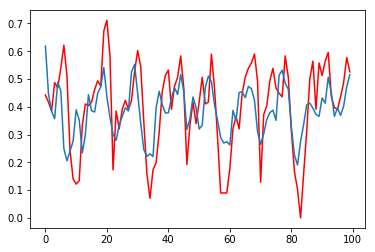

T = 6


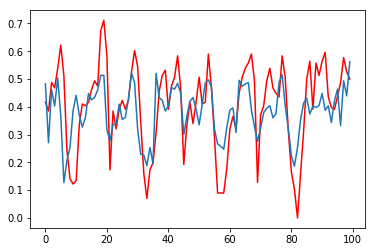

T = 7


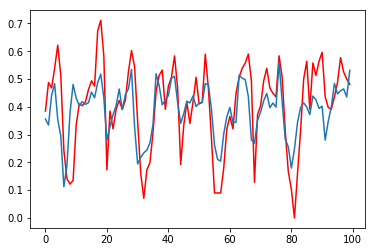

T = 8


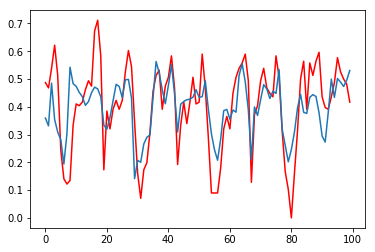

T = 9


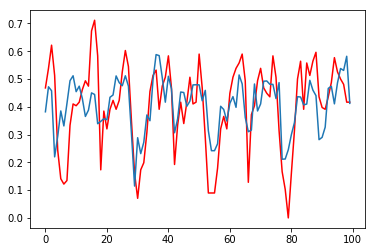

T = 10


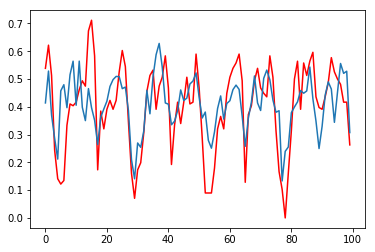

T = 11


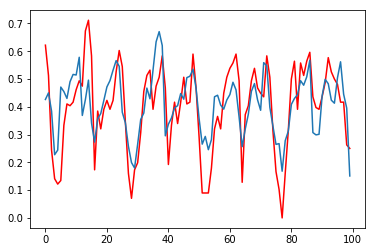

T = 12


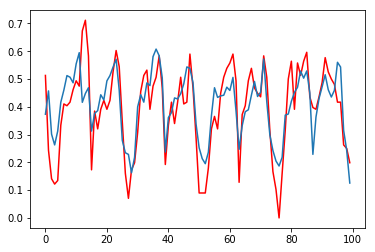

In [17]:
for i in range(12):
    print("T = "+ str(i+1))
    fig = plt.figure()
    plt.plot(test_output[:100,i], 'r')
    plt.plot(prediction[:100,i])
    plt.show()